<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# 📝  Project1

**글로벌 시장을 노리고 게임 개발을 기획하는 기획팀에 있다고 가정한다.  어떤 장르의 게임을 어떤 플랫폼으로 출시하는 것이 좋을지 고려해본다.**


## **파일 가져오기 및 import**

In [4]:
import pandas as pd
import numpy as np
import re
from google.colab import files
import io
import matplotlib.pyplot as plt 
import random
import seaborn as sns

In [4]:
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv('vgames2.csv',index_col=0)

In [ ]:
df.head(3)

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

## **전처리**

---



In [18]:
df.info()

NameError: ignored

###**발견된 문제 **
1. `Platform` 에서 지원 플랫폼 명이 숫자인 데이터가 존재한다.
  
  -> 행을 모두 **제거한다.**
2. `Year` 에서 데이터가 N/A 인 데이터가 존재한다.
 
  -> 문자열인 듯 하였으나 다른 문제로 인해 문자열처럼 출력되는 현상이었다. **제거한다**.
3. `Year` 에서 연도숫자의 범위가 아닌 데이터가 존재한다. 
  
  -> 1950년 ~ 2050년 범위 이외의 데이터는 모두 **제거한다. **

  -> 자료형을 int로 교체한다.

4. `Genre, Publisher`가 공백인 데이터가 존재한다.

  -> 데이터를 모두 **제거한다.**

5. `Publisher` 이름이 숫자형인 데이터가 존재한다. 

  -> 이름이 숫자만 있는 행은 **제거한다.**

6. `Sales` 데이터들에서 K,M 등 값들의 단위가 중구난방이다.

  -> 모든 단위를 M 단위로 **통일한다**. 단위 표시가 없는 값은 모두 M으로 가정한다.

  -> 480K는 0.48 로 나타낸다. 4100K는 4.1 로 나타낸다.

  -> 숫자에 M,K가 붙은 경우 떼버린다.

  -> 자료형을 float로 교체한다.

7. 기종이 없이 밀려적혀 결측값이 존재하는 값이 존재한다.

  -> 제거한다.

**1.** Platform 에서 지원 플랫폼 명이 숫자인 데이터가 존재한다.

In [19]:
DF = df.copy() # 원본 데이터 수정 방지

NameError: ignored

In [ ]:
NotPlatform = df[~df['Platform'].str.contains(r'[A-Za-z]')].index # 알파벳을 포함하지 않는 데이터 제거

In [ ]:
DF = DF.drop(NotPlatform).reset_index(drop = True)

**2.** Year 에서 데이터가 N/A 인 데이터가 존재한다. 

**3.** 연도숫자의 범위가 아닌 데이터가 존재한다.

In [ ]:
valid_Year = "Year>1950 & Year<2050"
DF = DF.query(valid_Year)

In [ ]:
DF.Year = DF.Year.astype('int')  # int형으로 변경

**4.** 장르,퍼블리셔가 공백인 데이터가 존재한다.

In [ ]:
DF.isnull().sum()

In [ ]:
DF = DF.dropna()


In [ ]:
DF = DF.reset_index()

**5.** `Publisher` 이름이 숫자형인 데이터가 존재한다. 

In [ ]:
NotPub = DF[~DF['Publisher'].str.contains(r'[A-Za-z]')].index # 알파벳을 포함하지 않는 데이터 제거

In [ ]:
NotPub # 없으니 pass 중간에 제거된듯

In [ ]:
DF.info() # 현재 상황

6.`Sales` 데이터들에서 K,M 등 값들의 단위가 중구난방이다.

-> 모든 단위를 M 단위로 통일한다.

-> 480K는 0.48 로 나타낸다. 4100K는 4.1 로 나타낸다.

-> 숫자에 M,K가 붙은 경우 떼버린다.

-> 자료형을 float로 교체한다.

In [20]:
def gett_value(DF,Sales):
  if DF[DF['Sales'].str.contains('K')]:
    DF = DF[DF['Sales'].str.replace('K','').astype('float')]
  return DF/1000

In [21]:
# file export
file_name = 'sample1.csv'
# saving the excelsheet
DF.to_csv(file_name, index=False)

In [77]:
uploaded = files.upload()

In [78]:
DF = pd.read_csv('sample3.csv',index_col=0)

**7.** 결측치 제거

In [79]:
DF['Other_Sales'][DF['Other_Sales'].isnull()]

index
7531    NaN
16064   NaN
Name: Other_Sales, dtype: float64

In [80]:
DF = DF.dropna().reset_index(drop=True)

In [81]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16024 entries, 0 to 16023
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16024 non-null  object 
 1   Platform     16024 non-null  object 
 2   Year         16024 non-null  object 
 3   Genre        16024 non-null  object 
 4   Publisher    16024 non-null  object 
 5   NA_Sales     16024 non-null  float64
 6   EU_Sales     16024 non-null  float64
 7   JP_Sales     16024 non-null  float64
 8   Other_Sales  16024 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


In [82]:
DF

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16019,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16020,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16021,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16022,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## **1. 지역에 따라서 선호하는 게임 장르가 다를까?**

In [83]:
DF.groupby('Genre')['NA_Sales'].sum()

Genre
Action          831.33
Adventure       100.95
Fighting        219.39
Misc            390.95
Platform        430.08
Puzzle          108.28
Racing          351.39
Role-Playing    307.08
Shooter         549.48
Simulation      180.62
Sports          662.19
Strategy         67.82
Name: NA_Sales, dtype: float64

In [84]:
NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
NA_ratio = NA_ratio.sort_values(ascending=False)

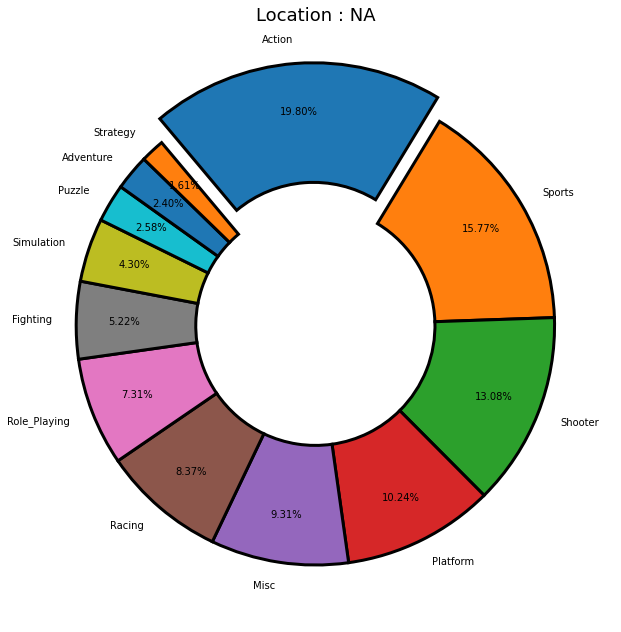

In [85]:
Action = NA_ratio.iloc[0]
Sports = NA_ratio.iloc[1]
Shooter = NA_ratio.iloc[2]
Platform = NA_ratio.iloc[3]
Misc = NA_ratio.iloc[4]
Racing = NA_ratio.iloc[5]
Role_Playing = NA_ratio.iloc[6]
Fighting = NA_ratio.iloc[7]
Simulation = NA_ratio.iloc[8]
Puzzle = NA_ratio.iloc[9]
Adventure = NA_ratio.iloc[10]
Strategy = NA_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Platform,Misc,Racing,Role_Playing,
         Fighting,Simulation,Puzzle,Adventure,Strategy]
labels = ['Action','Sports','Shooter','Platform','Misc','Racing','Role_Playing',
         'Fighting','Simulation','Puzzle','Adventure','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : NA", fontsize=18)

plt.show()


In [86]:
EU_ratio = DF.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)

In [87]:
EU_ratio

Genre
Action          561.00
Sports          369.57
Shooter         305.95
Racing          234.07
Misc            207.30
Platform        198.68
Role-Playing    176.31
Simulation      112.66
Fighting         99.68
Adventure        63.30
Puzzle           49.59
Strategy         44.70
Name: EU_Sales, dtype: float64

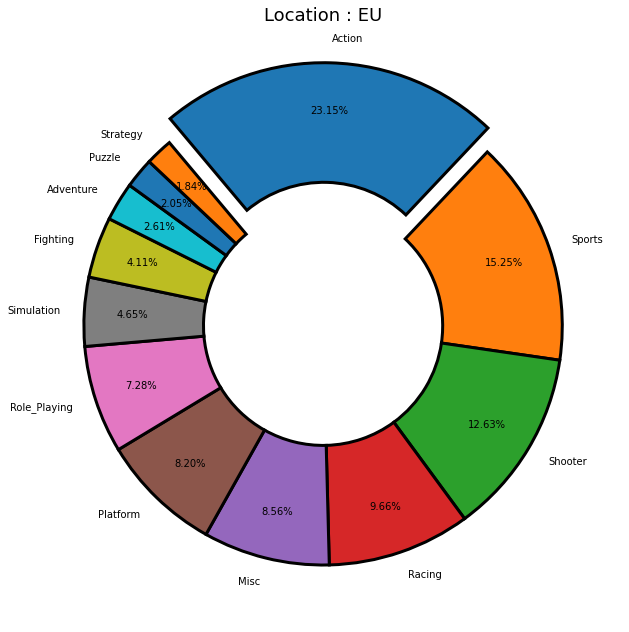

In [88]:
Action = EU_ratio.iloc[0]
Sports = EU_ratio.iloc[1]
Shooter = EU_ratio.iloc[2]
Racing = EU_ratio.iloc[3]
Misc = EU_ratio.iloc[4]
Platform = EU_ratio.iloc[5]
Role_Playing = EU_ratio.iloc[6]
Simulation = EU_ratio.iloc[7]
Fighting = EU_ratio.iloc[8]
Adventure = EU_ratio.iloc[9]
Puzzle = EU_ratio.iloc[10]
Strategy = EU_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Racing,Misc,Platform,Role_Playing,
         Simulation,Fighting,Adventure,Puzzle,Strategy]
labels = ['Action','Sports','Shooter','Racing','Misc','Platform','Role_Playing',
         'Simulation','Fighting','Adventure','Puzzle','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : EU", fontsize=18)

plt.show()

In [89]:
NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
NA_ratio = NA_ratio.sort_values(ascending=False)

In [90]:
JP_ratio = DF.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)

In [91]:
JP_ratio

Genre
Role-Playing    336.25
Action          167.61
Sports          134.58
Platform        129.22
Misc            103.71
Fighting         86.39
Simulation       63.46
Puzzle           56.19
Racing           55.42
Adventure        51.67
Strategy         48.13
Shooter          37.34
Name: JP_Sales, dtype: float64

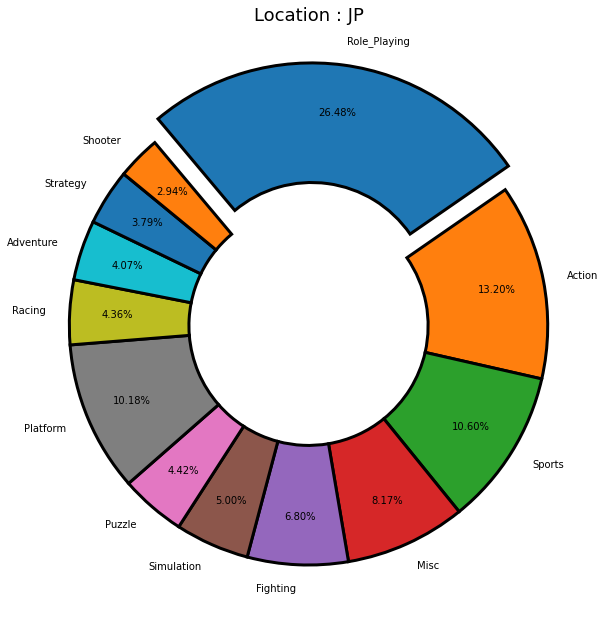

In [92]:
Role_Playing = JP_ratio.iloc[0]
Action = JP_ratio.iloc[1]
Sports = JP_ratio.iloc[2]
Platform = JP_ratio.iloc[3]
Misc = JP_ratio.iloc[4]
Fighting = JP_ratio.iloc[5]
Simulation = JP_ratio.iloc[6]
Puzzle = JP_ratio.iloc[7]
Racing = JP_ratio.iloc[8]
Adventure = JP_ratio.iloc[9]
Strategy = JP_ratio.iloc[10]
Shooter = JP_ratio.iloc[11]

ratio = [Role_Playing,Action,Sports,Misc,Fighting,Simulation,Puzzle,Platform,
         Racing,Adventure,Strategy,Shooter]
labels = ['Role_Playing','Action','Sports','Misc','Fighting','Simulation',
          'Puzzle','Platform',
         'Racing','Adventure','Strategy','Shooter']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : JP", fontsize=18)

plt.show()

In [93]:
Other_ratio = DF.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)

In [94]:
Other_ratio

Genre
Action          183.43
Sports          131.71
Shooter         100.58
Racing           76.22
Misc             72.51
Role-Playing     54.71
Platform         50.99
Simulation       41.23
Fighting         36.09
Adventure        16.64
Puzzle           12.24
Strategy         11.20
Name: Other_Sales, dtype: float64

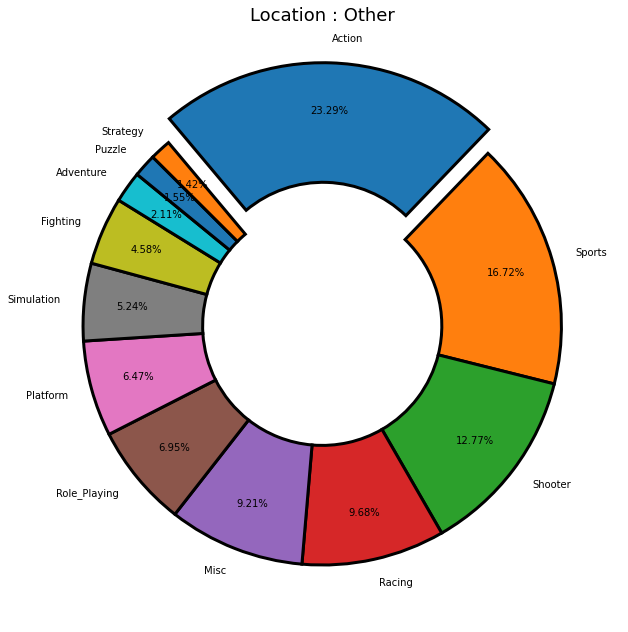

In [95]:
Action = Other_ratio.iloc[0]
Sports = Other_ratio.iloc[1]
Shooter = Other_ratio.iloc[2]
Racing = Other_ratio.iloc[3]
Misc = Other_ratio.iloc[4]
Role_Playing = Other_ratio.iloc[5]
Platform = Other_ratio.iloc[6]
Simulation = Other_ratio.iloc[7]
Fighting = Other_ratio.iloc[8]
Adventure = Other_ratio.iloc[9]
Puzzle = Other_ratio.iloc[10]
Strategy = Other_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Racing,Misc,Role_Playing,Platform,Simulation,
Fighting,Adventure,Puzzle,Strategy]
labels = ['Action','Sports','Shooter','Racing','Misc','Role_Playing','Platform',
          'Simulation',
'Fighting','Adventure','Puzzle','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : Other", fontsize=18)

plt.show()

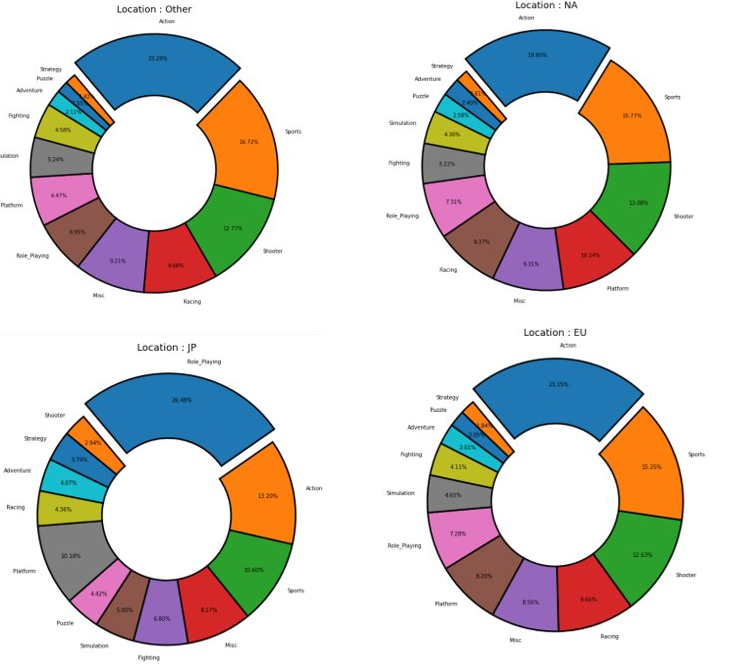

**대부분의 지역에서 액션, 스포츠, 슈팅게임의 판매순위가 높았으나** 

**유독 일본에서만은 롤플레잉 게임이 강세를 보이며 슈팅게임은 인기가 없는 것으로 나타났다.**
 
다만 일본에서도 액션게임은 롤플레잉 게임의 뒤를 이어 2등으로 꽤 인기가 있는 편이므로, 일본을 포함한 글로벌시장을 노리는 입장에서는 액션 게임을 개발하는 것이 가장 큰 시장에 뛰어드는 메리트를 얻을 수 있다고 생각한다. 


## **2. 연도별 게임의 트렌드가 있을까?**

게임의 트렌드를 **특정 장르의 유행**이라고 가정한다.

소비자입장에서 연도별로 유행한 게임장르가 있을 것이고, 

게임업체 입장에서 유행한 게임이 있을 것이며 아마 둘 사이에 유의미한 정비례 관계가 있을것이라고 예상. 

소비자가 특정 장르의 게임을 많이 사게되면 업체에서도 동일 장르의 게임을 만들게 될 것이기 때문



In [96]:
released = DF.groupby('Year')['Genre'].value_counts() # 각 년도별 발매 장르의 갯수

In [97]:
released=released.unstack('Genre').fillna(0).astype('int') # 발매안된 부분은 0으로 채우고 unstack
                                                           # index = Year

In [98]:
released.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [99]:
released.rename(columns={'Role-Playing':'Role_Playing'},inplace=True) 

In [100]:
released

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1983,0,0,0,1,4,0,0,0,0,0,1,0
1984,1,0,0,1,1,3,2,0,3,0,2,0
1985,2,0,1,0,4,3,0,0,1,1,1,0
1986,6,0,0,0,5,0,1,1,3,0,2,0
1987,0,1,2,0,2,0,0,3,0,0,2,0
1988,1,0,0,0,4,1,1,3,0,1,2,0
1989,1,0,0,1,3,4,0,2,1,0,3,0
1990,3,0,0,0,3,2,2,2,0,1,3,0
1991,5,2,1,1,6,4,1,5,3,2,7,4


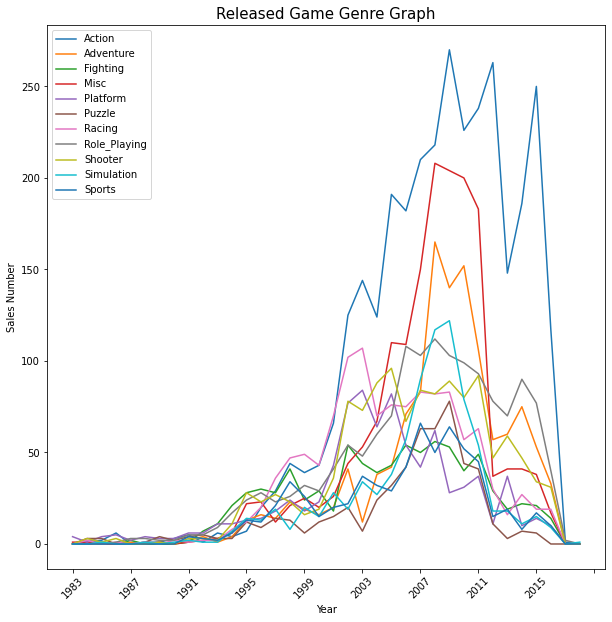

In [101]:
'''
한꺼번에 그리면 범례가 10개가 넘어갔을 경우 색이 같은 패턴이 반복되는데
색깔 분리를 해보려고 했으나, 결국 노가다 밖에 방법을 모르겠다..,
'''
plt.figure(figsize=(10, 10))
plt.plot(released.index,released.Action)
plt.plot(released.index,released.Adventure)
plt.plot(released.index,released.Fighting)
plt.plot(released.index,released.Misc)
plt.plot(released.index,released.Platform)
plt.plot(released.index,released.Puzzle)
plt.plot(released.index,released.Racing)
plt.plot(released.index,released.Role_Playing)
plt.plot(released.index,released.Shooter)
plt.plot(released.index,released.Simulation)
plt.plot(released.index,released.Strategy)

plt.title('Released Game Genre Graph',fontsize=15)

plt.xticks(np.arange(0,40,4),rotation=45)
plt.xlabel('Year')
plt.ylabel('Sales Number')
plt.legend(released,loc='upper left')
plt.show()

**주어진 데이터가 2017년 이후의 정보를 충분히 포함하고 있지 않아 최신게임동향과는 조금 다를 수 있다는 것은 고려한상태로 분석한다.**


업체들의 장르별 출고량을 보았을 때, 

1991년 까지는 유의미한 차이없이 비등비등한 모습을 보여주다가 
1995년부터 격투게임, 롤플레잉게임, 슈팅게임이 강세를 보인다.

2000년도부터는 레이싱게임, 액션게임이 많이 출시되었고, 

2005년도부터는 전체적으로 출고량이 굉장히 늘어남과 동시에 특히 액션게임의 압도적 강세를 볼 수 있다. 

또한 어드벤쳐, 시뮬레이션,슈팅게임,기타장르의 출고가 눈에띄게 늘어나고 레이싱게임이 서서히 줄어들기 시작한다.

분석한 자료중 비교적 가장 정확하며 최근인 2015년도 데이터에서는 액션게임이 압도적인 1등, 뒤를이어 큰 차이로 롤플레잉, 어드벤쳐 게임이 뒤를 잇는 모습을 볼 수 있다. 액션게임의 발매량이 높은 것에 비례하여 위에서 알아본 바와 같이 액션게임의 판매량도 제일 높았고, 이는 큰 시장과 높은 경쟁률을 동시에 의미한다는 것이라고 판단된다.

**그러나 2010년도 무렵부터는 집계되는 모든 장르의 게임의 출고가 급격하게 줄어드는데**, 

액션게임은 비교적 그 감소폭이 적고 2017년 무렵에 다시 고점을 찍었던 2008년도 수준의 출고량으로 회복한다.

나머지 게임들도 2017년 무렵 다시 반등하지만 예년에 비하면 한참 미치지 못하는 수준의 출고량을 보여주어 액션게임을 제외하면 다른 장르의 콘솔게임시장이 상당히 위축되었다고 판단된다.

이렇게 게임 시장이 위축된 원인은 스마트폰의 출시로 인해 게임시장 자체는 커졌지만 모바일 게임의 비중이 크게 늘었기 때문이다. 한국 콘텐츠 진흥원의 글로벌게임산업 트렌드에 따르면 콘솔게임에서 모바일게임으로 게임산업의 중심이 넘어감에 따라 콘솔 기반 비디오게임 시장이 크게 위축되었음을 알 수 있다.

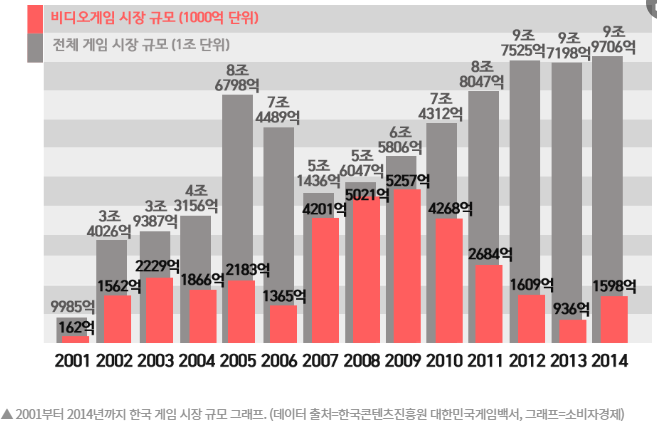

실제로도 2010년대에 들어서 급격히 비디오게임 시장이 감소하고 있음을 볼 수 있다.
따라서 콘솔게임 판매전략을 계속 유지하려 한다면 높은 경쟁률을 뚫기위해 최소 AA급 양질의 액션게임을 개발하는 전략으로 가야하며, 이는 곧 긴 개발시간과 높은 개발비용이 소모로 이어질 것이라고 예상된다. 또한 성공에 실패했을 경우 Risk도 상당할 것이다. 

따라서 이를 감당할 수 있는 수준의 자금력이 되지 않는다면, 성장하고 있는 모바일 게임시장으로 노선을 바꾸는 것도 현명한 판단이 될 것이다.
다만 모바일 게임시장으로 가더라도 액션게임은 전통적으로 계속 인기있는 장르이므로, 액션 모바일 게임을 개발하는 방향도 좋아보인다.

 ## **3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

주어진 자료에서 얼마나 각 업체가 얼마나 제품을 출고했는지는 주어진 자료에 나와있지 않기때문에, 

출고량은 판매량과 같다고 할 수는 없으나 여기에서는 출고한 제품이 모두 팔렸다는 가정하에 

**최종 판매량으로 출고량을 추정하기로 한다.**

같은 게임이라면 출고 플랫폼이 다르다고해서 다른 게임으로 취급하지 않게 주의한다.

In [106]:
DF2 = DF.copy() #훼손 방지

In [107]:
# sum_Sales = 각 지역의 총 판매량의 합
DF2['sum_Sales'] = DF2['NA_Sales'] + DF2['EU_Sales']+ DF2['JP_Sales']+ DF2['Other_Sales']

In [108]:
name_sumSale = DF2[['Name','Platform','Year','Genre','Publisher','sum_Sales']] 
name_sumSale.sort_values(['Name','sum_Sales'],ascending=False) 

,Name,Platform,Year,Genre,Publisher,sum_Sales
207,¡Shin Chan Flipa en colores!,DS,2007,Platform,505 Games,0.14
14515,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.19
2961,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.02
13491,uDraw Studio,Wii,2010,Misc,THQ,2.45
3379,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01
...,...,...,...,...,...,...
1135,.hack//Infection Part 1,PS2,2002,Role-Playing,Atari,1.26
12709,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.17
10294,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.16
6891,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.23


In [109]:
name_sumSale = name_sumSale.sort_values(['sum_Sales'],ascending=False) # 플랫폼을 구분한 상태에서 판매량 순위 
name_sumSale.head(10)

,Name,Platform,Year,Genre,Publisher,sum_Sales
2814,Wii Sports,Wii,2006,Sports,Nintendo,82.74
132,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,50.10
4057,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
12157,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3242,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
7566,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38
1172,Tetris,GB,1989,Puzzle,Nintendo,30.26
6700,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
2917,Wii Play,Wii,2006,Misc,Nintendo,29.01
15959,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.61


In [110]:
result = name_sumSale['sum_Sales'].groupby(name_sumSale['Name']).sum() # 이름별로 sum_sales의 합 구하기

In [111]:
result = result.to_frame() # 이름별로 합 정리된 시리즈

In [112]:
result =result.reset_index()

In [113]:
result = result.sort_values('sum_Sales',ascending=False ) # 각 게임별로 총 판매량 순위
result.head(10)

,Name,sum_Sales
10664,Wii Sports,82.74
3571,Grand Theft Auto V,55.92
10588,Warriors Orochi 3,51.10
9035,Super Mario Bros.,45.31
9415,Tetris,35.84
5390,Mario Kart Wii,35.83
10666,Wii Sports Resort,33.00
7113,Pokemon Red/Pokemon Blue,31.38
1178,Call of Duty: Modern Warfare 3,30.84
6510,New Super Mario Bros.,30.01


각 플랫폼간의 구분 없이 가장 많이 팔린 상위 10개의 게임과 

발매 콘솔기기까지 포함한 가장 많은 판매량을 기록한 상위 10개의 게임을 나타내 보았다.


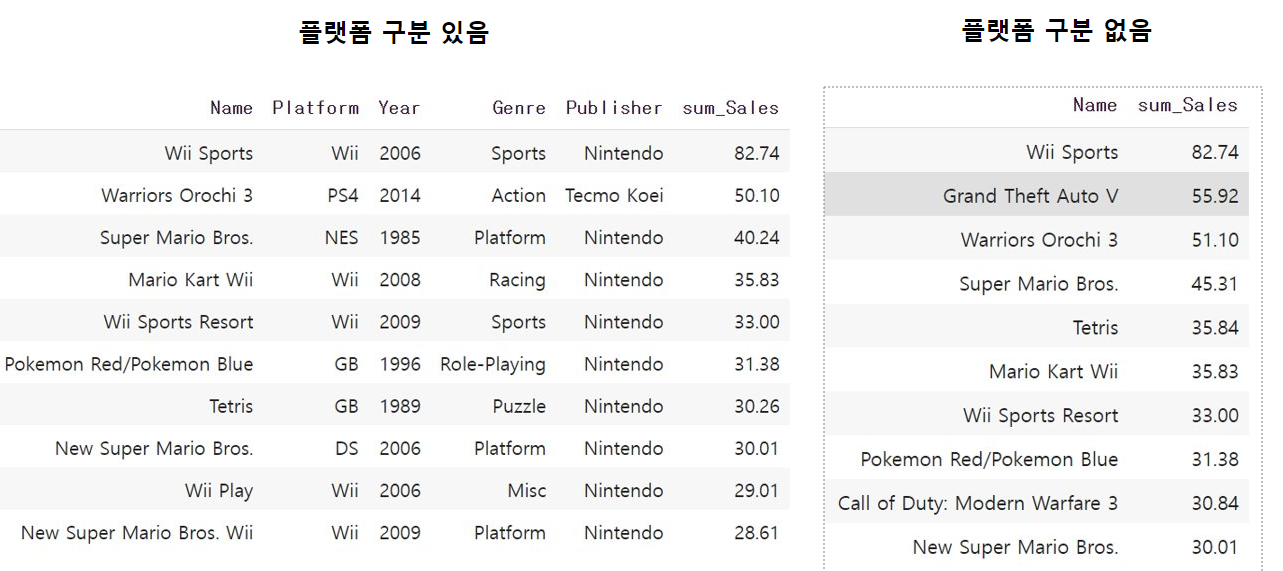

**우선 닌텐도 게임들의 엄청난 판매량이 눈에 띈다**. 단일 플랫폼 기준 상위 10개 판매량 중 `Warriors Orochi 3` 를 제외한 9개가 닌텐도의 게임이다. 또한 닌텐도 Wii, NES, 게임보이, DS등 자사에서 출시한 콘솔로 출시한 게임들이 유려한 매출을 올리고 있어 **콘솔판매량 면에서도 굉장한 수익**을 올렸을 것으로 예상된다.


플랫폼 구분을 없앴을 때, 상위 10위권에 새로 얼굴을 내민 게임은 `GTA5`와 `MW3` 이며, 눈에 띄는 차이점은 두 가지 이다.
1. 순위권에 없던 `GTA5`가 플랫폼 구분을 없애자 2위까지 치고올라왔다는 점이다. AAA대작 게임답게 **최대한 다양한 콘솔에 출시**하려한 전략이 먹혀들어갔다는 점을 알 수 있다. 같이 순위권에 등장한 `MW3`도 같은 전략을 사용했다고 예측한다.

2. 위 표에서 볼 수 있듯이 닌텐도 WIi 게임들은 모든 타이틀을 합친 통계에서도 판매량이 그대로이다. 닌텐도는 가장 최신 콘솔이라 할 수 있는 Wii 에서 **타이틀 독점 출시 전략**을 강하게 펴고 있었고, 그게 잘 먹혀들어갔다는 점이다. 닌텐도는 2006년~2010년은 게임뿐만 아니라 콘솔도 많은 판매량을 올렸을 것이고 이 시기에 굉장한 성장을 이뤄냈을 것이라고 예측할 수 있다.


다양한 플랫폼에 판매하는 전략을 사용하여 많은 매출을 올린 두 게임 GTA5 와 MW3 의 플랫폼 별 판매량은 다음과 같다.

In [114]:
gta5 = DF2.query("Name=='Grand Theft Auto V'")
mw3 = DF2.query("Name=='Call of Duty: Modern Warfare 3'")

In [115]:
gta5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
1945,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3368,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
10475,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
10551,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
16002,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


In [116]:
gta5 = gta5.sort_values('sum_Sales',ascending = False)

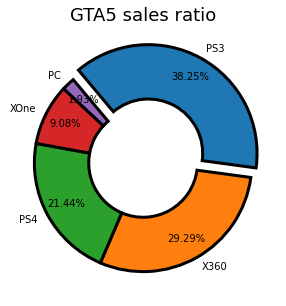

In [117]:
PS3 = gta5.sum_Sales.iloc[0]
X360 = gta5.sum_Sales.iloc[1]
PS4 = gta5.sum_Sales.iloc[2]
XOne =gta5.sum_Sales.iloc[3]
PC = gta5.sum_Sales.iloc[4]


ratio = [PS3,X360,PS4,XOne,PC]
labels = ['PS3','X360','PS4','XOne','PC']

exp = [0.1,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(5, 5))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("GTA5 sales ratio", fontsize=18)

plt.show()

In [118]:
mw3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
2717,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4817,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,0.60,0.21,0.00,0.08,0.89
10809,Call of Duty: Modern Warfare 3,PC,2011,Shooter,Activision,0.41,0.98,0.00,0.33,1.72
13641,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47


In [119]:
mw3 = mw3.sort_values('sum_Sales',ascending = False)

In [120]:
mw3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
2717,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
13641,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
10809,Call of Duty: Modern Warfare 3,PC,2011,Shooter,Activision,0.41,0.98,0.00,0.33,1.72
4817,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,0.60,0.21,0.00,0.08,0.89


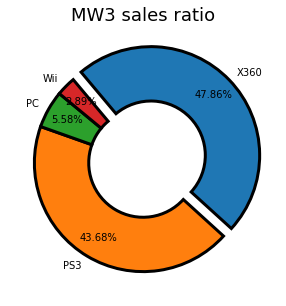

In [121]:
X360 = mw3.sum_Sales.iloc[0]
PS3 = mw3.sum_Sales.iloc[1]
PC = mw3.sum_Sales.iloc[2]
Wii = mw3.sum_Sales.iloc[3]

ratio = [X360,PS3,PC,Wii]
labels = ['X360','PS3','PC','Wii']

exp = [0.1,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(5, 5))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("MW3 sales ratio", fontsize=18)

plt.show()

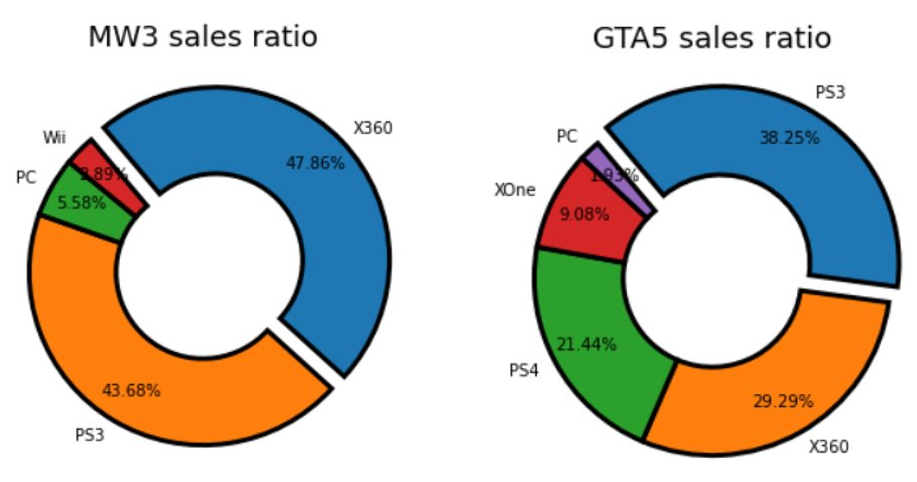

`GTA5` 의 경우 비교적 다양한 플랫폼에서 고른 판매량을 보여 다양한 플랫폼에 발매한 전략이 성공한 모습이다.

반면 `MW3` 의 경우 판매량의 90%가 두 가지 플랫폼에 집중되어 있는 모습이다. 특히 Wii 의 경우 지나치게 낮은 판매량으로 차후 시리즈에서 Wii 플랫폼에 대한 판매를 재고려 해야 했을 것이다. 이는 Wii 플랫폼이 저렴한 콘솔기기를 기반으로 가정용게임을 주로 발매하기 때문에 화려한 액션게임에 비교적 적합하지 않았을 것이라고 판단된다.

또한 액션게임을 즐김에 있어서 PC는 소비자들이 비교적 선호하는 플랫폼이 아님을 알 수 있다.
따라서 액션게임이 최우선 고려해야 하는 플랫폼은 PS3, X360 이다.

## **4. 성공한 작품의 후속작이 다시 성공할 가능성**




기존 성공한 작품의 후속작들도 성공했는지 여부를 보고 신규 타이틀을 개발할지 후속편을 낼지 판단한다.

성공여부는 전체 발매 작품중 판매량이 상위 10% 안에 드는 게임으로 설정한다.

원작보다 판매량이 낮더라도 상위 10% 안에 들었다면 성공한 타이틀이다.

실패한 작품의 후속작이 성공했는지는 고려하지 않는다. 

후속작이 성공했더라도 원작이 실패했다면 고려대상이 아니다.

In [126]:
isSuccess = result.copy()

In [168]:
isSuccess.sum_Sales.quantile(q=0.90,interpolation='nearest') # 상위 10퍼 판매량 컷

5.34

In [169]:
Success_25 = isSuccess.query("sum_Sales>=5.34") 

In [170]:
Success_25 = Success_25.sort_values('Name') # 상위 25%

In [171]:
Success_25 = Success_25.reset_index(drop=True)

In [180]:
Success_25 # 판매량 상위 5% 안에 들어간 게임은 총 141개 

,Name,sum_Sales
0,Animal Crossing: New Leaf,9.10
1,Animal Crossing: Wild World,12.28
2,Assassin's Creed,11.30
3,Assassin's Creed II,11.39
4,Assassin's Creed III,13.10
...,...,...
276,Wii Sports,82.74
277,Wii Sports Resort,33.00
278,Winning Eleven: Pro Evolution Soccer 2007,5.53
279,World of Warcraft,6.28


([<matplotlib.patches.Wedge at 0x7f6b0aee41d0>,
 [Text(-0.9918267473860676, 0.4756886620149507, 'succ'),
  Text(0.991826725117473, -0.47568870844571126, 'fail')],
 [Text(-0.5409964076651277, 0.2594665429172458, '85.77%'),
  Text(0.5409963955186216, -0.2594665682431152, '14.23%')])

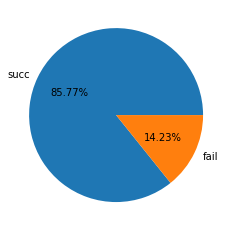

In [177]:
succ = 241
fail = 40
ratio = [succ,fail]
labels = ['con_success','others']
plt.pie(ratio, labels=labels,autopct='%.2f%%')

성공한 작품의 후속작이 성공할 확률은 최소 85% 이상으로 굉장히 높다고 할 수 있으며 others에는 후속작만 성공했을 확률도 섞여 있으므로 후속작이 성공할 확률은 85% 보다 더 높다고 할 수 있다.

참고로 성공여부를 상위 20% 까지 올렸을 경우, 결과는 다음과 같다.

In [189]:
isSuccess.sum_Sales.quantile(q=0.80,interpolation='nearest') # 상위 20퍼 판매량 컷

3.1599999999999997

In [198]:
Success_20 = isSuccess.query("sum_Sales>=3.159") 

In [199]:
Success_20 = Success_20.sort_values('Name') # 상위 20%

In [200]:
Success_20 = Success_20.reset_index(drop=True)

In [201]:
Success_20

,Name,sum_Sales
0,007: Quantum of Solace,3.91
1,007: Tomorrow Never Dies,3.21
2,A Bug's Life,3.42
3,Ace Combat 04: Shattered Skies,3.17
4,Animal Crossing,3.16
...,...,...
556,X-Men Legends,3.36
557,Yokai Watch 2 Ganso/Honke,3.21
558,Zelda II: The Adventure of Link,4.38
559,Zumba Fitness,9.79


([<matplotlib.patches.Wedge at 0x7f6b0add3850>,
 [Text(-0.9833028547344526, 0.4930674354194124, 'con_success'),
  Text(0.9833028085701432, -0.4930675274828678, 'others')],
 [Text(-0.5363470116733376, 0.268945873865134, '85.20%'),
  Text(0.5363469864928053, -0.2689459240815642, '14.80%')])

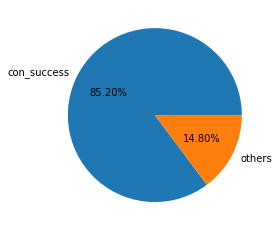

In [203]:
succ = 561-83
fail = 83
ratio = [succ,fail]
labels = ['con_success','others']
plt.pie(ratio, labels=labels,autopct='%.2f%%')

놀랍게도 비슷한 결과가 나왔으며, 따라서 판매율 상위권에 속하는 게임이 있다면 다음 분기 작으로 기존 게임의 후속작을 내놓는 것을 고려하는 것이 좋다.

## **4.연도별 인기타이틀과 콘솔 판매량의 관련성 유무**

연도별 가장 높은 매출을 기록한 인기타이틀의 경우, 플랫폼의 판매량에 영향을 미쳤는지 판단해본다. 
